# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Angel Racini Meza
## C.C 1017248189


In [165]:
#Importando las librerias necesarias para trabajar el problema. 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [46]:
#Importando el dataset
df = pd.read_csv(r"C:\Users\ANGEL\Desktop\Trabajo Redes Neuronales\evaluacion-arracinim\datos\diabetes.csv", sep=",", encoding= 'utf-8')
#Mostrando el data set
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [47]:
#Cambiando el nombre a las columnas del dataset
df.columns = ['edad', 'sexo', 'imc', 'presion', 's1', 's2', 's3', 's4', 's5', 's6', 'Y']


## Exploratory Data Exploration  EDA

In [5]:
#Medidas de dispersion estandar
df.describe()

,edad,sexo,imc,presion,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Podemos notar que todos los features y el target son datos numericos.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

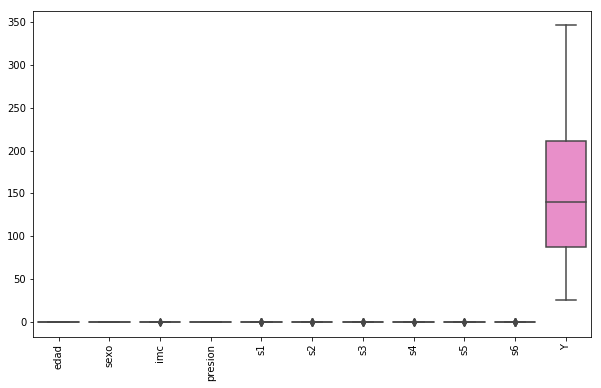

In [38]:
#Graficando un boxplot para cada variable 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

Podemos notar que los datos deben ser escalados para evitar problemas asociados a la escala. 

## Data Transformation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

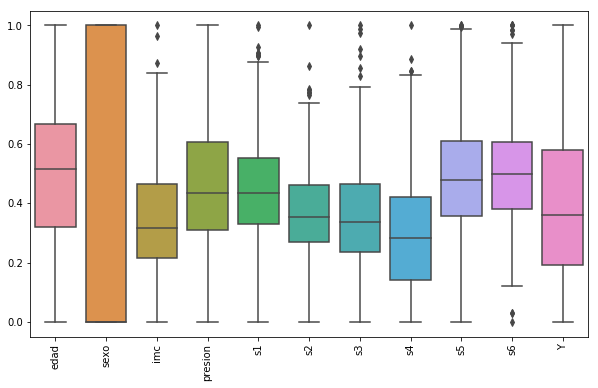

In [50]:
#Graficando despues de escalar.
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90)

Al escalar los datos podemos notar algunos outlayers sobretodo en las muentras de serum. Estos outlayers podrían corresponder a niveles elevados de la muestra o a errores en la medicion de estas. 

## Feauture Selection

In [101]:
#Vamos a elegir las variables de mayor importancia mediante un test-f de dependencia lineal entre las variables. 
x = df_norm.iloc[:,0:9]
y = df_norm.iloc[:,10]

#Se selecciona los 4 features con mayor relevancia para el modelo 
X_new = SelectKBest(score_func = f_regression, k = 4).fit_transform(x, y)
X_new

array([[0.58264463, 0.54929577, 0.28208745, 0.56221737],
       [0.14876033, 0.35211268, 0.14104372, 0.22244301],
       [0.51652893, 0.43661972, 0.28208745, 0.49658437],
       ...,
       [0.28512397, 0.53051643, 0.24964739, 0.30504048],
       [0.49586777, 0.46478873, 0.39351199, 0.65702021],
       [0.0661157 , 0.12676056, 0.14104372, 0.46930778]])

In [108]:
#Para este caso las variables que mas afectan o mueven el target son IMC, PRESION, S4 Y S5
X = df_norm.loc[:,['imc', 'presion', 's4', 's5']]
Y = df_norm.loc[:,['Y']]

#Se divide el conjunto en dos subconjuntos uno de entrenamiento y otro de validacion, con el 80% y 20% de los datos respectivamente

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Linear Model 

In [83]:
#Se crea un modelo de regresion lineal multiple de la forma y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + d
lm = LinearRegression()
#se entrena el modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
#Se valida el modelo con los datos de validacion
y_pred = lm.predict(X_test)

#Se obtienen las metricas del modelo
# Error cuadratico medio 
print("Error Cuadratico Medio: %.2f" % mean_squared_error(y_test, y_pred))
print("Ajuste: %.2f" % lm.score(X_test, y_test))

Error Cuadratico Medio: 0.03
Ajuste: 0.36


Podemos ver que el modelo tiene un error cuadratico medio bajo lo que indica que la varianza entre lo que se predice y lo que es no es mucha, pero el ajuste del modelo lineal no es bueno.

(0, 1)

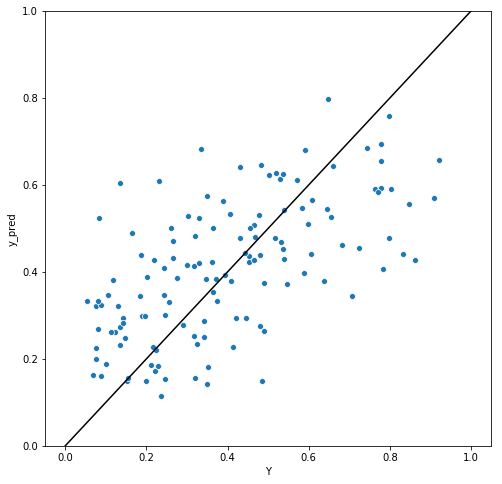

In [105]:
#Graficando para obtener una mejor visualización entre lo predicho y lo dicho.
plt.figure(figsize=(8, 8))
y_test['y_pred'] = y_pred
sns.scatterplot(x='Y', y='y_pred', data= y_test)
plt.plot([0, 1], [0, 1], color='black')
plt.ylim(0,1)

## Cross Validation

In [163]:
#Obteniendo el score de validacion mediante la tenica de validación cruzada por la tecnica de K-Folds
scores = cross_val_score(lm, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.46 (+/- 0.10)


Por el metodo de validación cruzada tenemos que el Ajuste medio está entre un rango de (0.36 y 0.56). Lo cual sigue siendo un modelo no muy preciso para estimar.

## Neural Network Model

In [326]:
#np.random.seed(20200320)

m = MLPRegressor(hidden_layer_sizes=(8, ),
                 activation = 'relu',
                 learning_rate = 'adaptive',
                 momentum = 0.94,
                 solver= 'sgd',
                 shuffle = True,
                 learning_rate_init = 0.012,
                 max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
m.fit(X_train,  y_train.values.ravel())

#Obtenemos la metrica de ajuste del modelo
print("El R-Cuadrado es: %.2f" % (m.score(X_test, y_test)))

El R-Cuadrado es: 0.31


## Cross Validation for the Neural Network Model


In [328]:
scores = cross_val_score(m, X, Y.values.ravel(), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.14 (+/- 0.58)


Podemos notar que la precisión del modelo no es la mejor. Se sugiere la utilización de una transformación a los datos. 

## Conclusiones

- Los datos requieren algun tipo de transformacion que permita mejorar la predicción de los datos mediante un modelo lineal, ya que actualmente escalar no basta. Se obtuvo un maximo de ajuste de 0.4 lo cual es muy bajo y no es capaz de predecir con exactitud el modelo deseado.